Nama: Nico Pranama Hadi,
NIM: 2702344204


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/employee_performance.csv')
print(df.head())

  Employee_ID             Name Department    Job_Title  Hours_Worked  \
0       E0001      Paula Smith  Marketing      Analyst          1661   
1       E0002    Matthew Lewis    Finance  Coordinator          1276   
2       E0003  Jeffrey Kennedy      Sales  Coordinator          1623   
3       E0004     Karen Holmes    Finance     Engineer          1515   
4       E0005    Alexis Fowler    Finance      Manager          1842   

   KPI_Score  
0      79.03  
1      80.54  
2      91.38  
3      76.68  
4      86.18  


In [ ]:
print('Info Dataset')
print(df.info())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Employee_ID   500 non-null    object 
 1   Name          500 non-null    object 
 2   Department    500 non-null    object 
 3   Job_Title     500 non-null    object 
 4   Hours_Worked  500 non-null    int64  
 5   KPI_Score     500 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 23.6+ KB
None


In [ ]:
print('Ukuran Dataset (row, col)')
print(df.shape)

Ukuran Dataset (row, col)
(500, 6)


In [ ]:
print('Nama Kolom')
print(df.columns)

Nama Kolom
Index(['Employee_ID', 'Name', 'Department', 'Job_Title', 'Hours_Worked',
       'KPI_Score'],
      dtype='object')


In [ ]:
print('Statistik Deskriptif')
print(df.describe())

Statistik Deskriptif
       Hours_Worked   KPI_Score
count    500.000000  500.000000
mean    1602.324000   80.040160
std      360.708975   10.214159
min     1000.000000   46.120000
25%     1284.000000   73.555000
50%     1629.500000   80.485000
75%     1922.500000   87.405000
max     2198.000000  100.000000


In [ ]:
print('Jumlah Missing Value per Kolom')
print(df.isnull().sum())

Jumlah Missing Value per Kolom
Employee_ID     0
Name            0
Department      0
Job_Title       0
Hours_Worked    0
KPI_Score       0
dtype: int64


In [ ]:
print('Jumlah Data Duplikat')
print(df.duplicated().sum())

Jumlah Data Duplikat
0


In [ ]:
print("Distribusi Department")
print(df['Department'].value_counts())

Distribusi Department
Department
Marketing      97
HR             90
Operations     86
Sales          77
Finance        75
Engineering    75
Name: count, dtype: int64


In [ ]:
print('Top 10 KPI')
top_10_kpi = df.nlargest(10, 'KPI_Score')[['Employee_ID', 'Name', 'Department', 'KPI_Score']]
print(top_10_kpi)

Top 10 KPI
    Employee_ID            Name   Department  KPI_Score
13        E0014  Cynthia Palmer      Finance      100.0
41        E0042       Mark Wood        Sales      100.0
80        E0081    Lisa Richard  Engineering      100.0
105       E0106     Kayla Davis    Marketing      100.0
158       E0159     Amanda Lamb   Operations      100.0
160       E0161  Kimberly Burke  Engineering      100.0
168       E0169   Julia Shepard    Marketing      100.0
179       E0180  Brittany Patel           HR      100.0
193       E0194  Kimberly Burke      Finance      100.0
249       E0250       Sean Hill    Marketing      100.0


In [ ]:
print('Bottom 10 KPI')
bottom_10_kpi = df.nsmallest(10, 'KPI_Score')[['Employee_ID', 'Name', 'Department', 'KPI_Score']]
print(bottom_10_kpi)

Bottom 10 KPI
    Employee_ID               Name   Department  KPI_Score
477       E0478   Kimberly Simmons      Finance      46.12
455       E0456    Melinda Jenkins  Engineering      55.31
259       E0260  Rebekah Wilkinson           HR      55.45
320       E0321          Kim Drake        Sales      55.84
430       E0431          Susan Fox    Marketing      56.64
211       E0212      Nancy Bullock           HR      56.75
457       E0458     Jason Williams  Engineering      57.06
203       E0204       Ronald Hurst   Operations      57.15
355       E0356      Jason Proctor   Operations      57.23
307       E0308  Francisco Elliott  Engineering      58.43


In [ ]:
dept_avg_kpi = df.groupby('Department')['KPI_Score'].mean().reset_index()
dept_avg_kpi.columns = ['Department', 'Average_KPI_Score']
print('Rata-Rata KPI per Department')
print(dept_avg_kpi)

Rata-Rata KPI per Department
    Department  Average_KPI_Score
0  Engineering          79.951333
1      Finance          80.376400
2           HR          78.021333
3    Marketing          79.875567
4   Operations          81.190116
5        Sales          81.081818


In [ ]:
print('Tambah Kolom KPI per Hour')
df['KPI_per_Hour'] = df['KPI_Score'] / df['Hours_Worked']

Tambah Kolom KPI per Hour


In [ ]:
print("Preview dengan kolom baru")
df[['Employee_ID', 'Name', 'Department', 'KPI_Score', 'Hours_Worked', 'KPI_per_Hour']].head()

Preview dengan kolom baru


,Employee_ID,Name,Department,KPI_Score,Hours_Worked,KPI_per_Hour
0,E0001,Paula Smith,Marketing,79.03,1661,0.047580
1,E0002,Matthew Lewis,Finance,80.54,1276,0.063119
2,E0003,Jeffrey Kennedy,Sales,91.38,1623,0.056303
3,E0004,Karen Holmes,Finance,76.68,1515,0.050614
4,E0005,Alexis Fowler,Finance,86.18,1842,0.046786


Rata-rata KPI per Department


/tmp/ipython-input-2745624942.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Average_KPI_Score', data=dept_avg_kpi, palette='Blues_d')


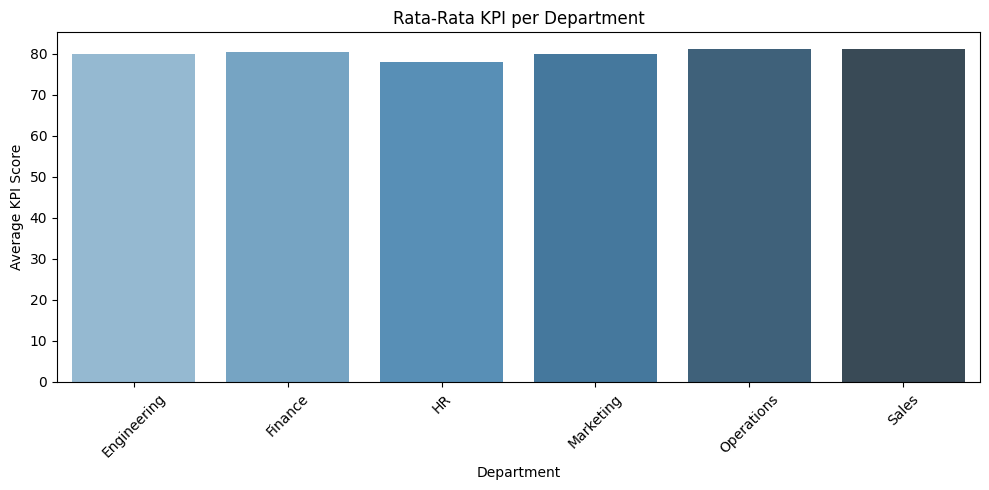

In [ ]:
print('Rata-rata KPI per Department')
plt.figure(figsize=(10, 5))
sns.barplot(x='Department', y='Average_KPI_Score', data=dept_avg_kpi, palette='Blues_d')
plt.title('Rata-Rata KPI per Department')
plt.xlabel('Department')
plt.ylabel('Average KPI Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3390980169.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Name', y='KPI_Score', data=top_10_kpi, palette='Greens_d')


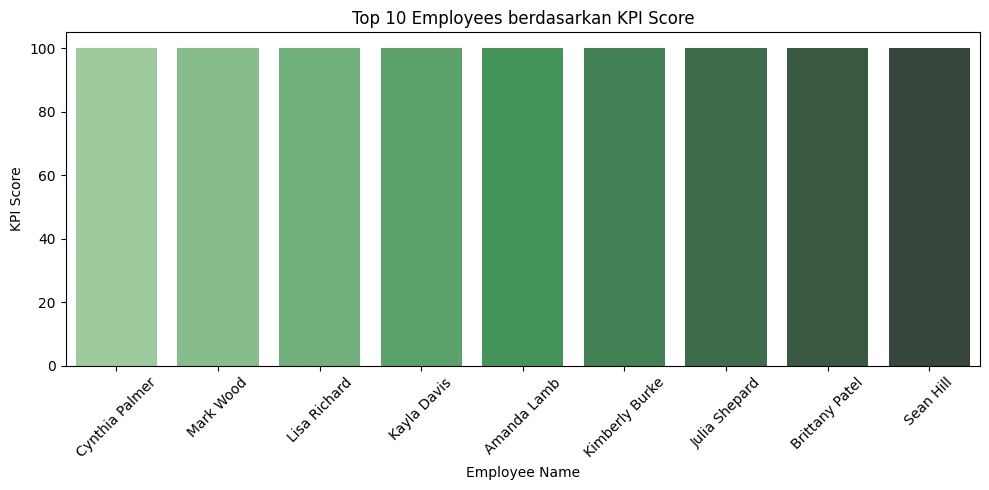

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Name', y='KPI_Score', data=top_10_kpi, palette='Greens_d')
plt.title('Top 10 Employees berdasarkan KPI Score')
plt.ylabel('KPI Score')
plt.xlabel('Employee Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

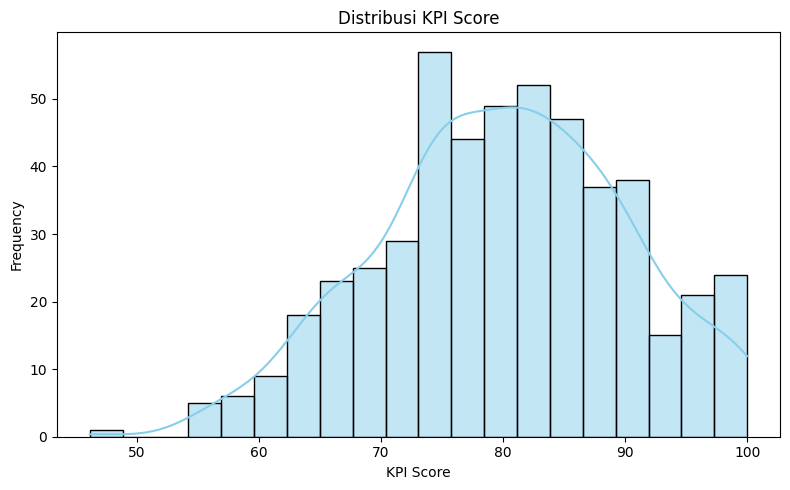

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df['KPI_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi KPI Score')
plt.xlabel('KPI Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

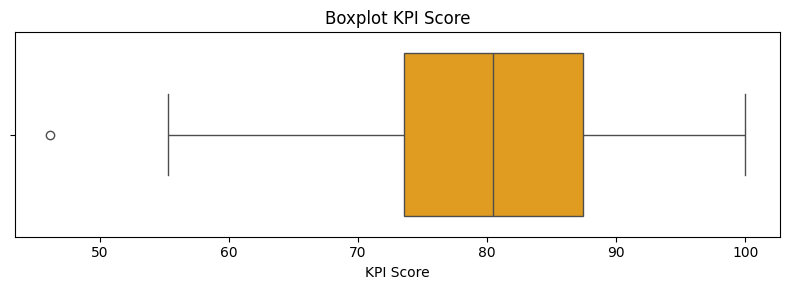

In [49]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['KPI_Score'], color='orange')
plt.title('Boxplot KPI Score')
plt.xlabel('KPI Score')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('cleaned_employee_performance.csv', index=False)
print("\n File baru disimpan sebagai 'cleaned_employee_performance.csv'")


 File baru disimpan sebagai 'cleaned_employee_performance.csv'
